In [1]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')

inpatient_beds_used_covid = Pacientes informados actualmente hospitalizados en una cama para pacientes hospitalizados que tienen sospecha o confirmación de COVID-19 en este estado
staffed_icu_adult_patients_confirmed_covid = Pacientes informados actualmente hospitalizados en una cama de UCI para adultos que han confirmado COVID-19 en este estado
total_pediatric_patients_hospitalized_confirmed_covid = Pacientes informados actualmente hospitalizados en una cama de hospitalización pediátrica, incluidos NICU, recién nacidos y salas de recién nacidos, que son positivos para COVID-19 confirmados por laboratorio. Esto incluye aquellos en camas de observación.
adult_icu_bed_covid_utilization = Porcentaje del total de camas de UCI para adultos con personal actualmente utilizadas por pacientes con sospecha o confirmación de COVID-19 en este estado. Este número solo representa los hospitales en el estado que informan los campos
deaths_covid = muertes por covid
adult_icu_bed_utilization = Porcentaje de camas de UCI para adultos con personal que se utilizan en este estado. Este número solo representa los hospitales en el estado que informan los campos





In [3]:
data.info()

In [3]:
#1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

data['date'] = data['date'].apply(lambda x: x.replace('/', '-'))
data.date = data.date.map(pd.Timestamp.fromisoformat)
data = data.sort_values(by='date')

In [76]:
copia = data.copy()
#copia = copia.loc[copia.state == 'TX']
#copia = copia.groupby(by='date').sum().reset_index()

In [95]:
estados = pd.DataFrame()
estados['codigo'] = copia.state.unique()
estados = estados.sort_values('codigo')
nombre_estado = ['Alaska',
                 'Alabama',
                 'Arkansas',
                 'Samoa Americana',
                 'Arizona',
                 'California',
                 'Colorado',
                 'Connecticut',
                 'Washington D. C.',
                 'Delaware',
                 'Florida',
                 'Georgia',
                 'Hawái',
                 'Iowa',
                 'Idaho',
                 'Illinois',
                 'Indiana',
                 'Kansas',
                 'Kentucky',
                 'Luisiana',
                 'Massachusetts',
                 'Maryland',
                 'Maine',
                 'Míchigan',
                 'Minnesota',
                 'Misuri',
                 'Misisipi',
                 'Montana',
                 'Carolina del Norte',
                 'Dakota del Norte',
                 'Nebraska',
                 'Nuevo Hampshire',
                 'Nueva Jersey',
                 'Nuevo México',
                 'Nevada',
                 'Nueva York',
                 'Ohio',
                 'Oklahoma',
                 'Oregón',
                 'Pensilvania',
                 'Puerto Rico',
                 'Rhode Island',
                 'Carolina del Sur',
                 'Dakota del Sur',
                 'Tennessee',
                 'Texas',
                 'Utah',
                 'Virginia',
                 'Islas Vírgenes de los Estados Unidos',
                 'Vermont',
                 'Washington',
                 'Wisconsin',
                 'Virginia Occidental',
                 'Wyoming']
estados['nombre_estado'] = nombre_estado
estados['cod_nom'] = estados.codigo + '-' + estados.nombre_estado
estados

In [74]:
sns.lineplot(data=copia, x='date', y='critical_staffing_shortage_today_yes')
sns.lineplot(data=copia, x='date', y='deaths_covid')

In [18]:
data_six_months_2022 = data[data.date < '2020-07-01']
data_2020 = data[data.date < '2021-01-01']
data_2021 = data[data.date < '2022-01-01'][data.date > '2020-12-31']

In [78]:
mayor_occupacion_hospitalaria = data_six_months_2022[['state', 'date', 'inpatient_beds_used_covid']]
mayor_occupacion_hospitalaria = mayor_occupacion_hospitalaria.groupby(by='state').mean()
mayor_occupacion_hospitalaria = mayor_occupacion_hospitalaria.sort_values(by='inpatient_beds_used_covid', ascending=False).reset_index()


In [44]:
#Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:
#Intervalos de crecimiento y decrecimiento
#Puntos críticos (mínimos y máximos)
ocupacion_de_camas_ny = data_2020[['state', 'date', 'inpatient_beds_used_covid']]
ocupacion_de_camas_ny = ocupacion_de_camas_ny[ocupacion_de_camas_ny.state == 'NY']

In [50]:
max = ocupacion_de_camas_ny.sort_values('inpatient_beds_used_covid', ascending=False)[:1]
min = ocupacion_de_camas_ny.sort_values('inpatient_beds_used_covid')[:1]

In [51]:
max

In [52]:
min

<AxesSubplot:xlabel='date', ylabel='inpatient_beds_used_covid'>

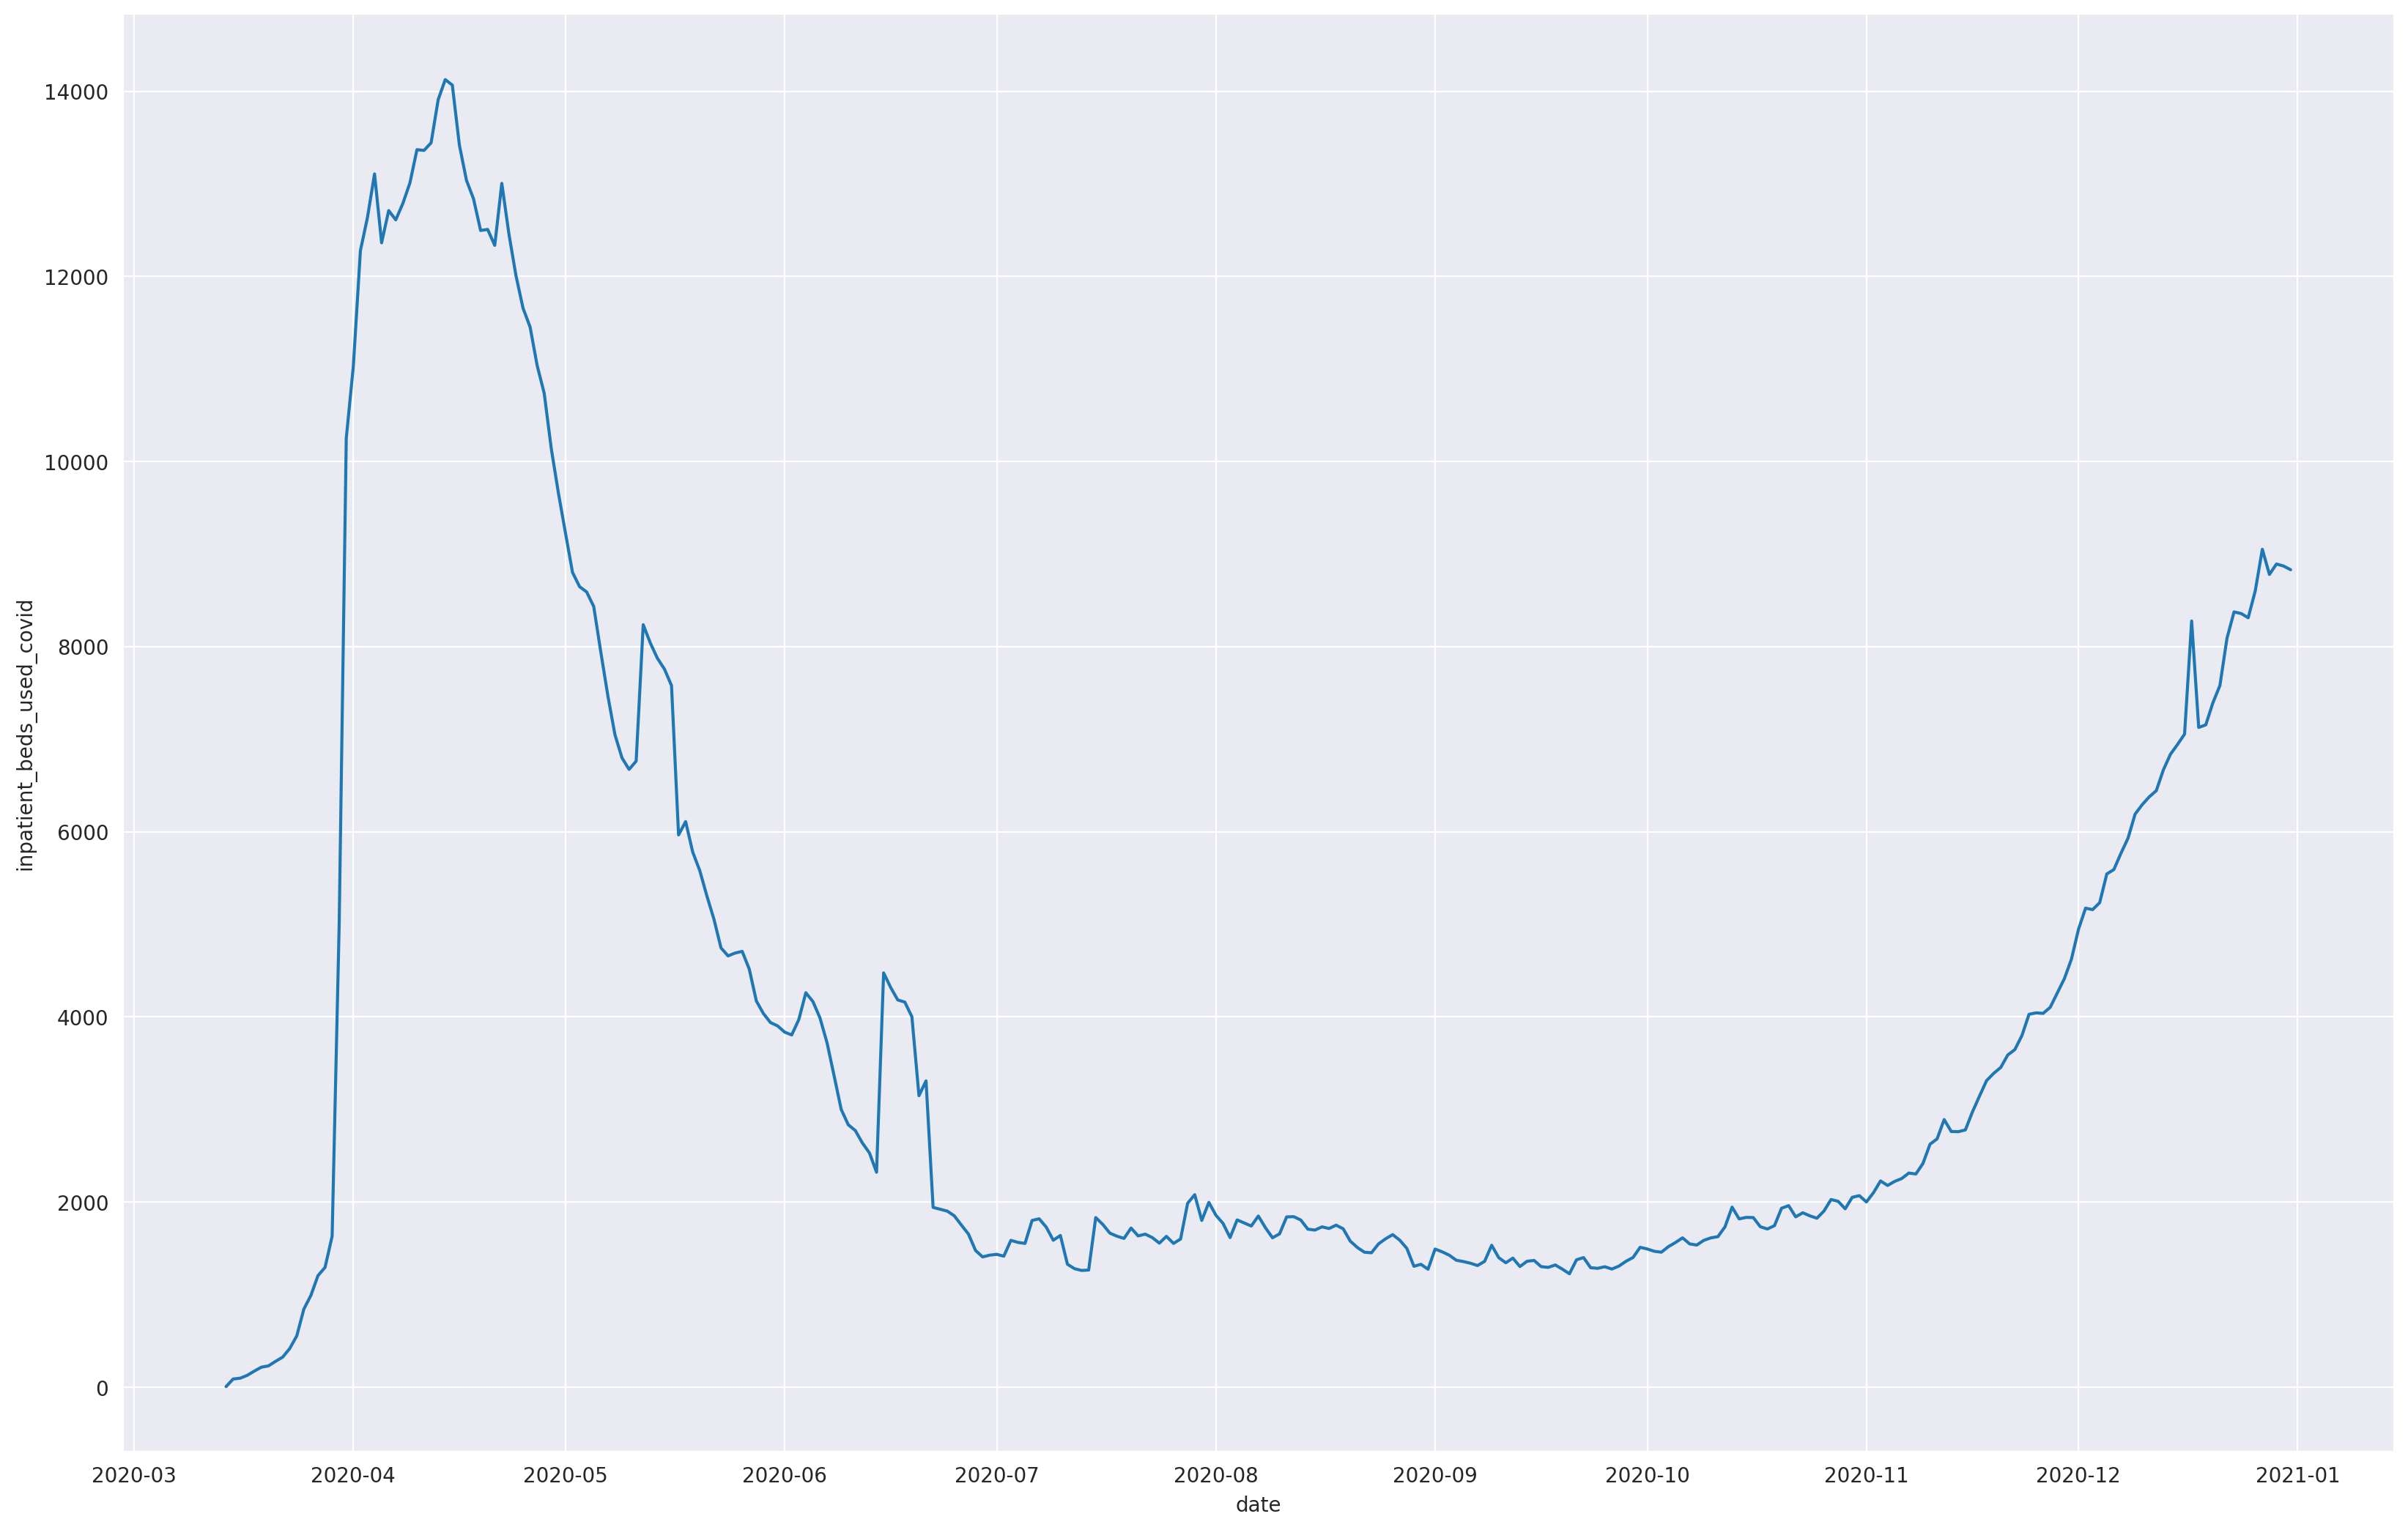

In [53]:
fig, ax = plt.subplots(figsize=(20,13), dpi= 200)
sns.lineplot(data=ocupacion_de_camas_ny, x='date', y='inpatient_beds_used_covid')

In [73]:
#¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.
camas_UCI = data_2020[['state', 'date', 'staffed_icu_adult_patients_confirmed_covid']]
camas_UCI = camas_UCI.groupby(by='state').sum()
camas_UCI.sort_values(by='staffed_icu_adult_patients_confirmed_covid', ascending=False)

,staffed_icu_adult_patients_confirmed_covid
state,
TX,335836.0
CA,260865.0
FL,175858.0
GA,95596.0
OH,89483.0
IL,88888.0
PA,84227.0
TN,77149.0
MO,70532.0


In [67]:
#¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?
camas_pacientes_pediatricos = data_2020[['state', 'date', 'total_pediatric_patients_hospitalized_confirmed_covid']]
camas_pacientes_pediatricos = camas_pacientes_pediatricos.groupby(by='state').sum()
camas_pacientes_pediatricos.sort_values(by='total_pediatric_patients_hospitalized_confirmed_covid', ascending=False)

,total_pediatric_patients_hospitalized_confirmed_covid
state,
TX,12582.0
CA,10031.0
FL,7391.0
AZ,5786.0
PA,5735.0
IL,5311.0
GA,5016.0
NY,5008.0
TN,4056.0


In [64]:
#¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.
porcentaje_camas_UCI = data_2020[['state', 'date', 'adult_icu_bed_covid_utilization']]
porcentaje_camas_UCI = porcentaje_camas_UCI.groupby(by='state').mean()
porcentaje_camas_UCI.sort_values(by='adult_icu_bed_covid_utilization', ascending=False)

,adult_icu_bed_covid_utilization
state,
MS,0.369580
TX,0.305718
GA,0.296965
NV,0.296744
AL,0.294226
KY,0.284591
AR,0.270111
NM,0.269031
OK,0.263246


In [14]:
#¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?
muertes_por_covid = data_2021[['state', 'date', 'deaths_covid']]
muertes_por_covid = muertes_por_covid.groupby(by='state').sum().sort_values('deaths_covid', ascending=False)
muertes_por_covid

,deaths_covid
state,
CA,35108.0
TX,32889.0
FL,26004.0
NY,17620.0
AZ,16250.0
PA,13363.0
GA,12338.0
OH,12023.0
NC,10922.0


In [47]:
#¿Qué relación presenta la falta de camas UCI disponibles con la cantidad de muertes durante el año 2021?
muertes_camas = data_2021[['date', 'deaths_covid', 'adult_icu_bed_utilization']]
muertes_camas['adult_icu_bed_free'] = 1 - muertes_camas['adult_icu_bed_utilization']
muertes_camas = muertes_camas.groupby(by='date').agg({'deaths_covid': 'sum', 'adult_icu_bed_utilization': 'mean'})
#muertes_camas['adult_icu_bed_covid_free'] = muertes_camas['adult_icu_bed_covid_free'] * 1000
muertes_camas['adult_icu_bed_utilization'] = muertes_camas['adult_icu_bed_utilization'] * 1000
muertes_camas

/tmp/ipykernel_8432/869727168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muertes_camas['adult_icu_bed_free'] = 1 - muertes_camas['adult_icu_bed_utilization']


,deaths_covid,adult_icu_bed_utilization
date,,
2021-01-01,2143.0,719.254171
2021-01-02,2047.0,705.859545
2021-01-03,2119.0,711.115882
2021-01-04,2183.0,717.072706
2021-01-05,2369.0,740.001169
...,...,...
2021-12-27,1146.0,743.286088
2021-12-28,1191.0,763.000823
2021-12-29,1306.0,767.056132


<AxesSubplot:xlabel='date', ylabel='deaths_covid'>

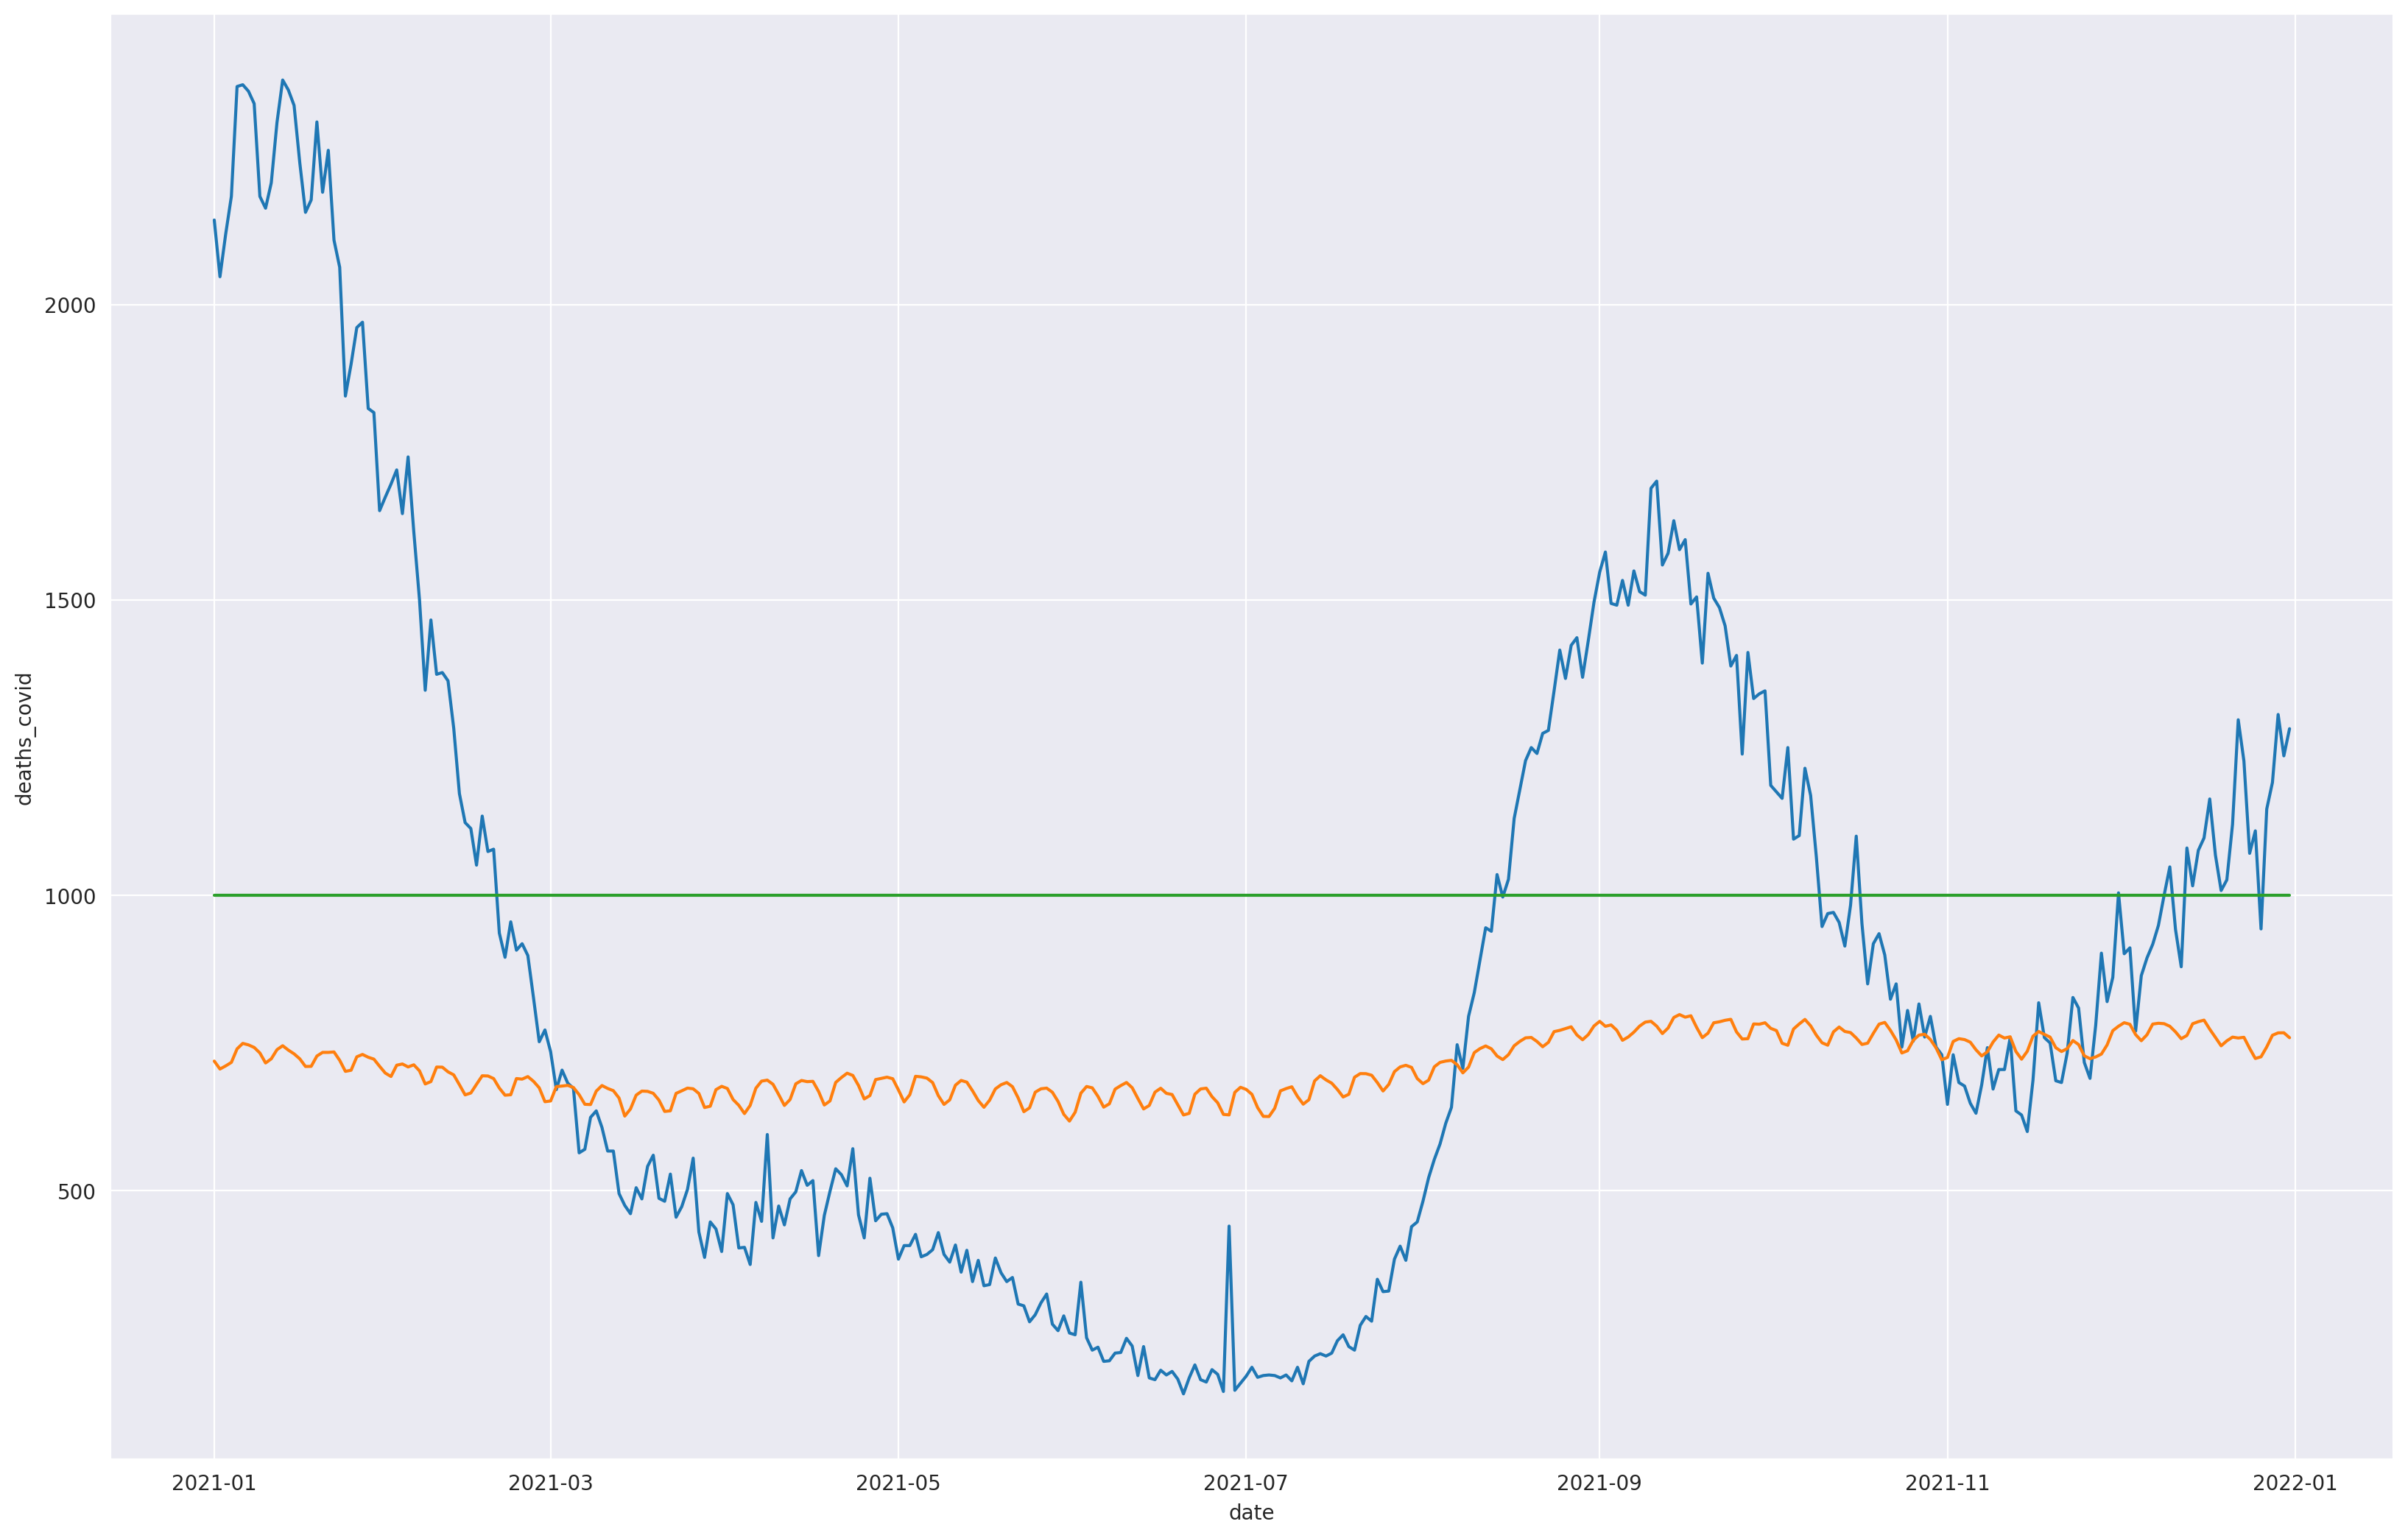

In [48]:
fig, ax = plt.subplots(figsize=(20,13), dpi= 200)
sns.lineplot(data=muertes_camas, x='date', y='deaths_covid')
sns.lineplot(data=muertes_camas, x='date', y='adult_icu_bed_utilization')
sns.lineplot(data=muertes_camas, x='date', y=1000)

<AxesSubplot:xlabel='date', ylabel='deaths_covid'>

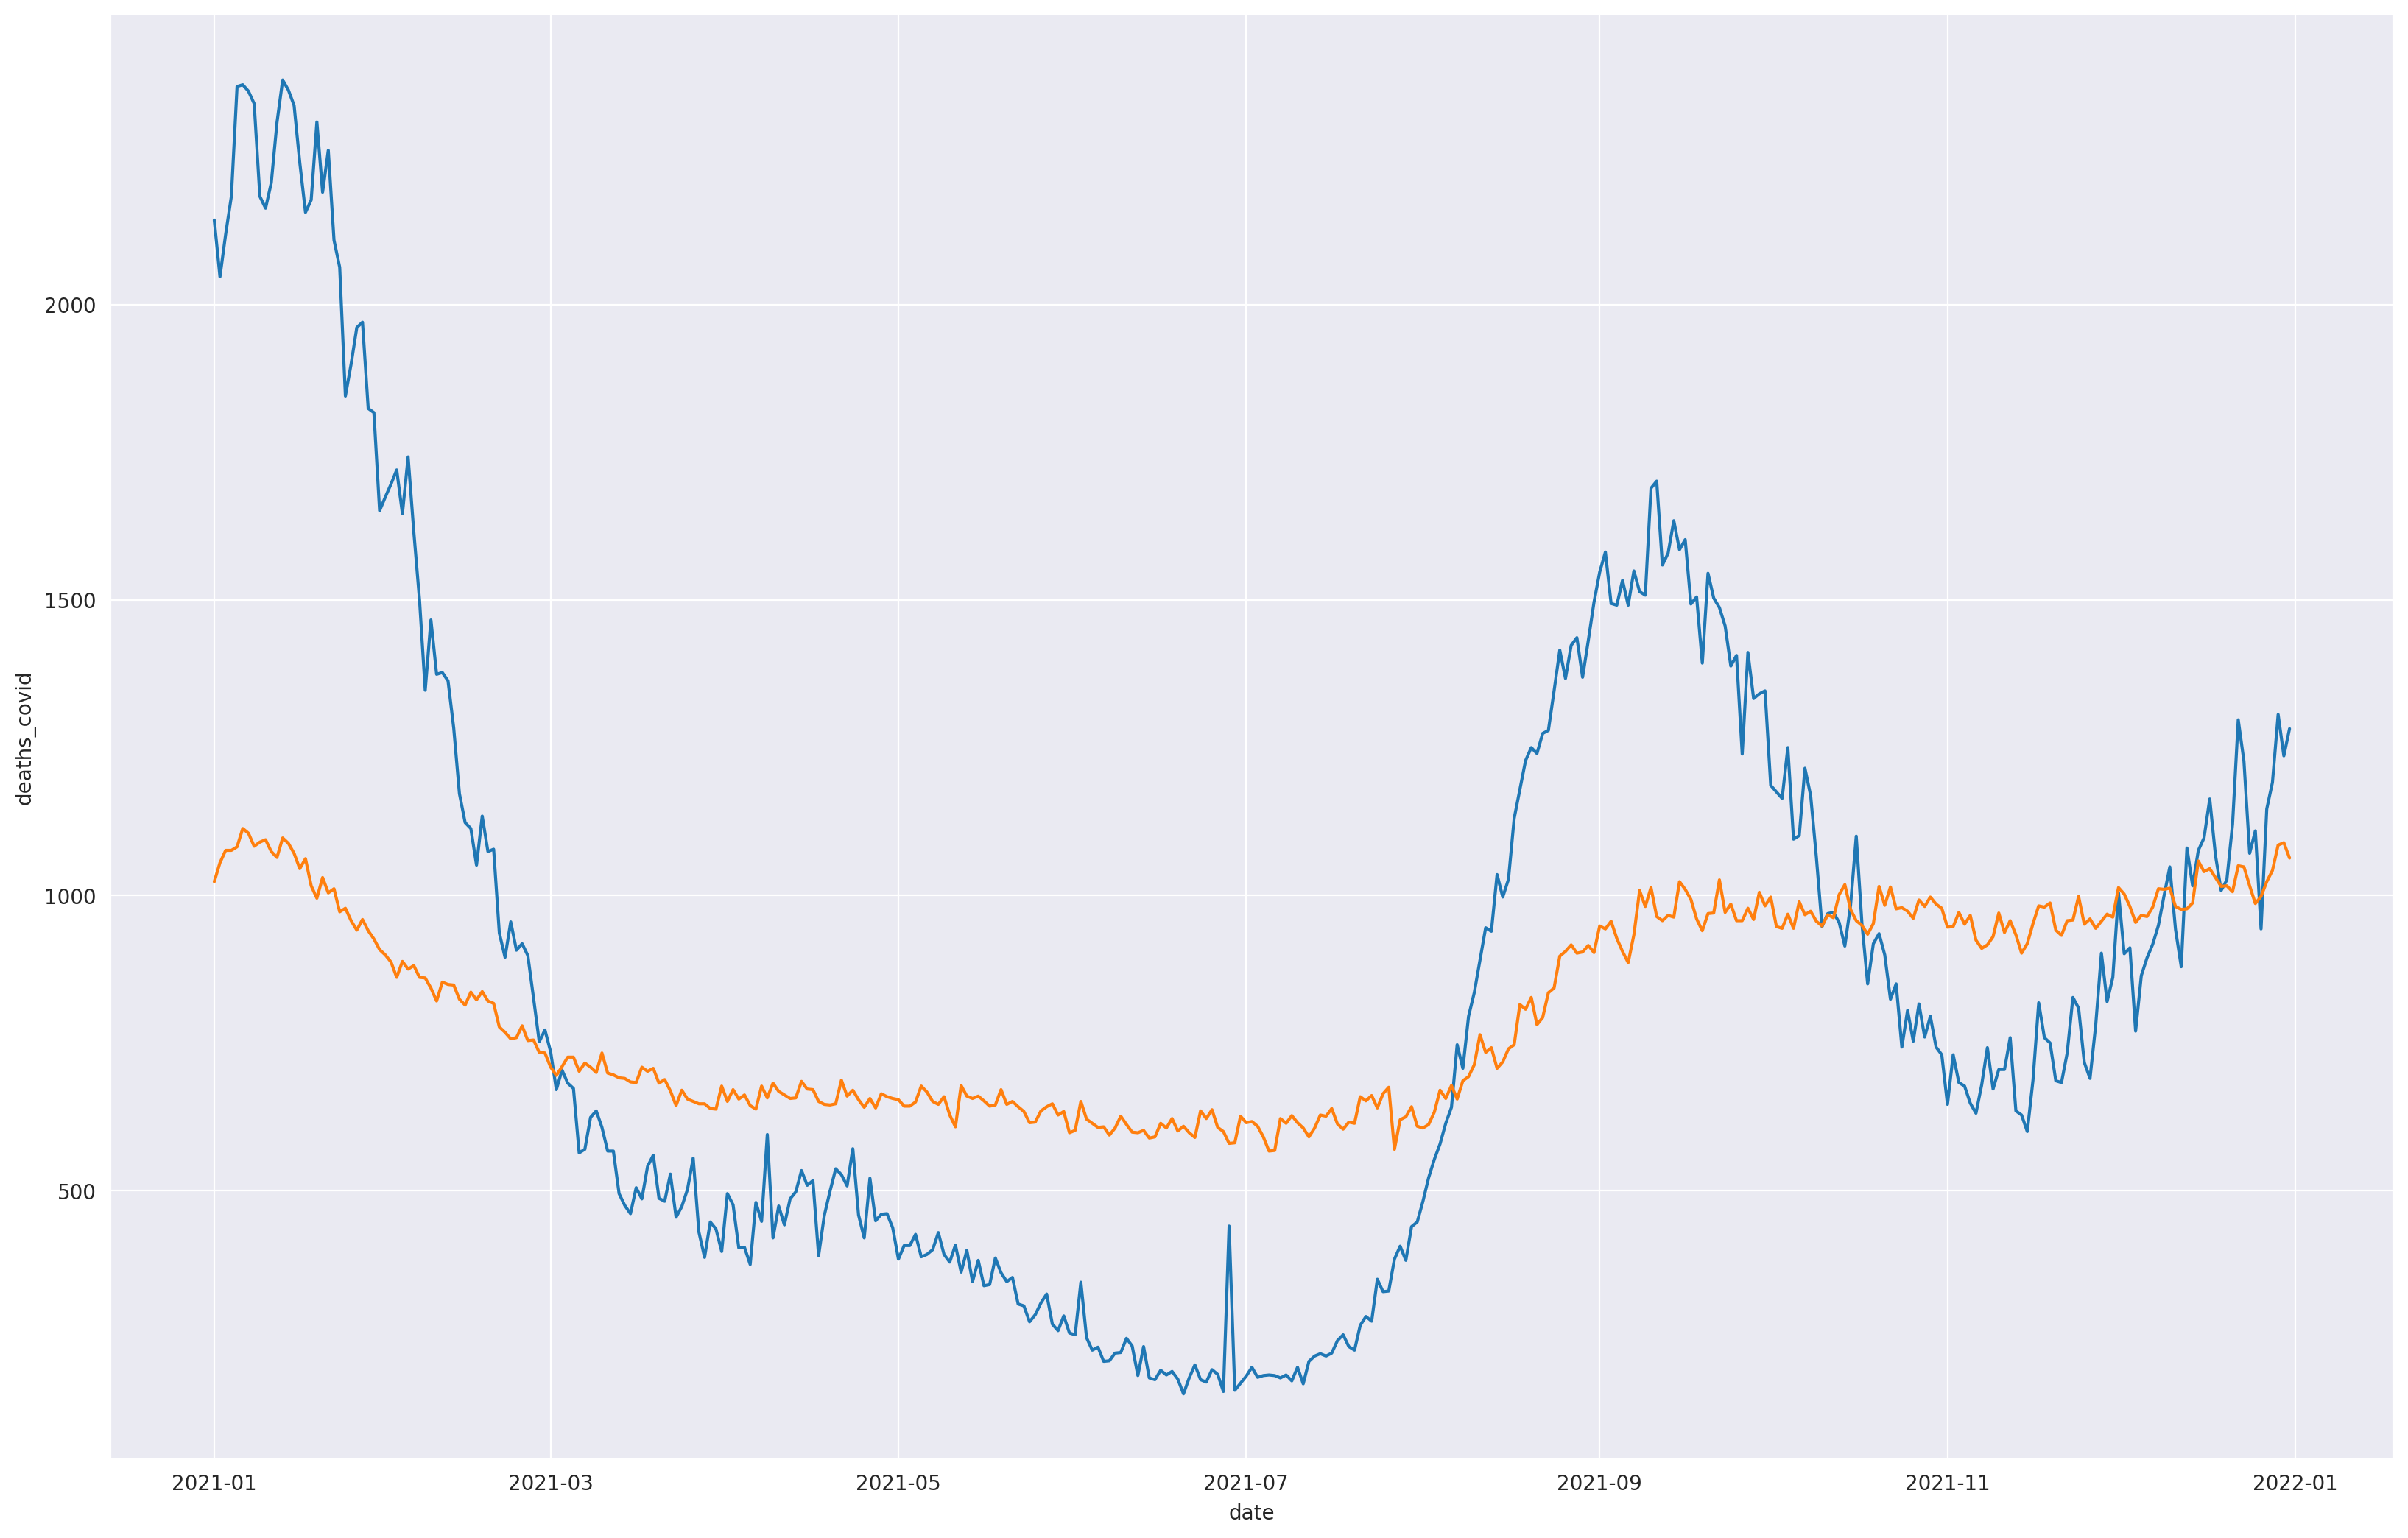

In [68]:
muertes_camas_personal = data_2021[['date', 'deaths_covid', 'critical_staffing_shortage_today_yes']]
muertes_camas_personal = muertes_camas_personal.groupby(by='date').sum()
fig, ax = plt.subplots(figsize=(20,13), dpi= 200)
sns.lineplot(data=muertes_camas_personal, x='date', y='deaths_covid')
sns.lineplot(data=muertes_camas_personal, x='date', y='critical_staffing_shortage_today_yes')
#sns.lineplot(data=muertes_camas, x='date', y=1000)

In [60]:
muertes_camas_CA = data_2021.loc[data_2021.state == 'CA']
muertes_camas_CA = muertes_camas_CA[['date', 'deaths_covid', 'adult_icu_bed_utilization']]
muertes_camas_CA['adult_icu_bed_free'] = 1 - muertes_camas_CA['adult_icu_bed_utilization']
muertes_camas_CA = muertes_camas_CA.groupby(by='date').agg({'deaths_covid': 'sum', 'adult_icu_bed_utilization': 'mean'})
muertes_camas_CA['adult_icu_bed_utilization'] = muertes_camas_CA['adult_icu_bed_utilization'] * 100
muertes_camas_CA

,deaths_covid,adult_icu_bed_utilization
date,,
2021-01-01,459.0,87.910959
2021-01-02,450.0,86.334552
2021-01-03,474.0,87.155551
2021-01-04,454.0,87.571189
2021-01-05,516.0,87.582283
...,...,...
2021-12-27,70.0,74.491258
2021-12-28,72.0,76.656648
2021-12-29,51.0,76.995172


<AxesSubplot:xlabel='date', ylabel='deaths_covid'>

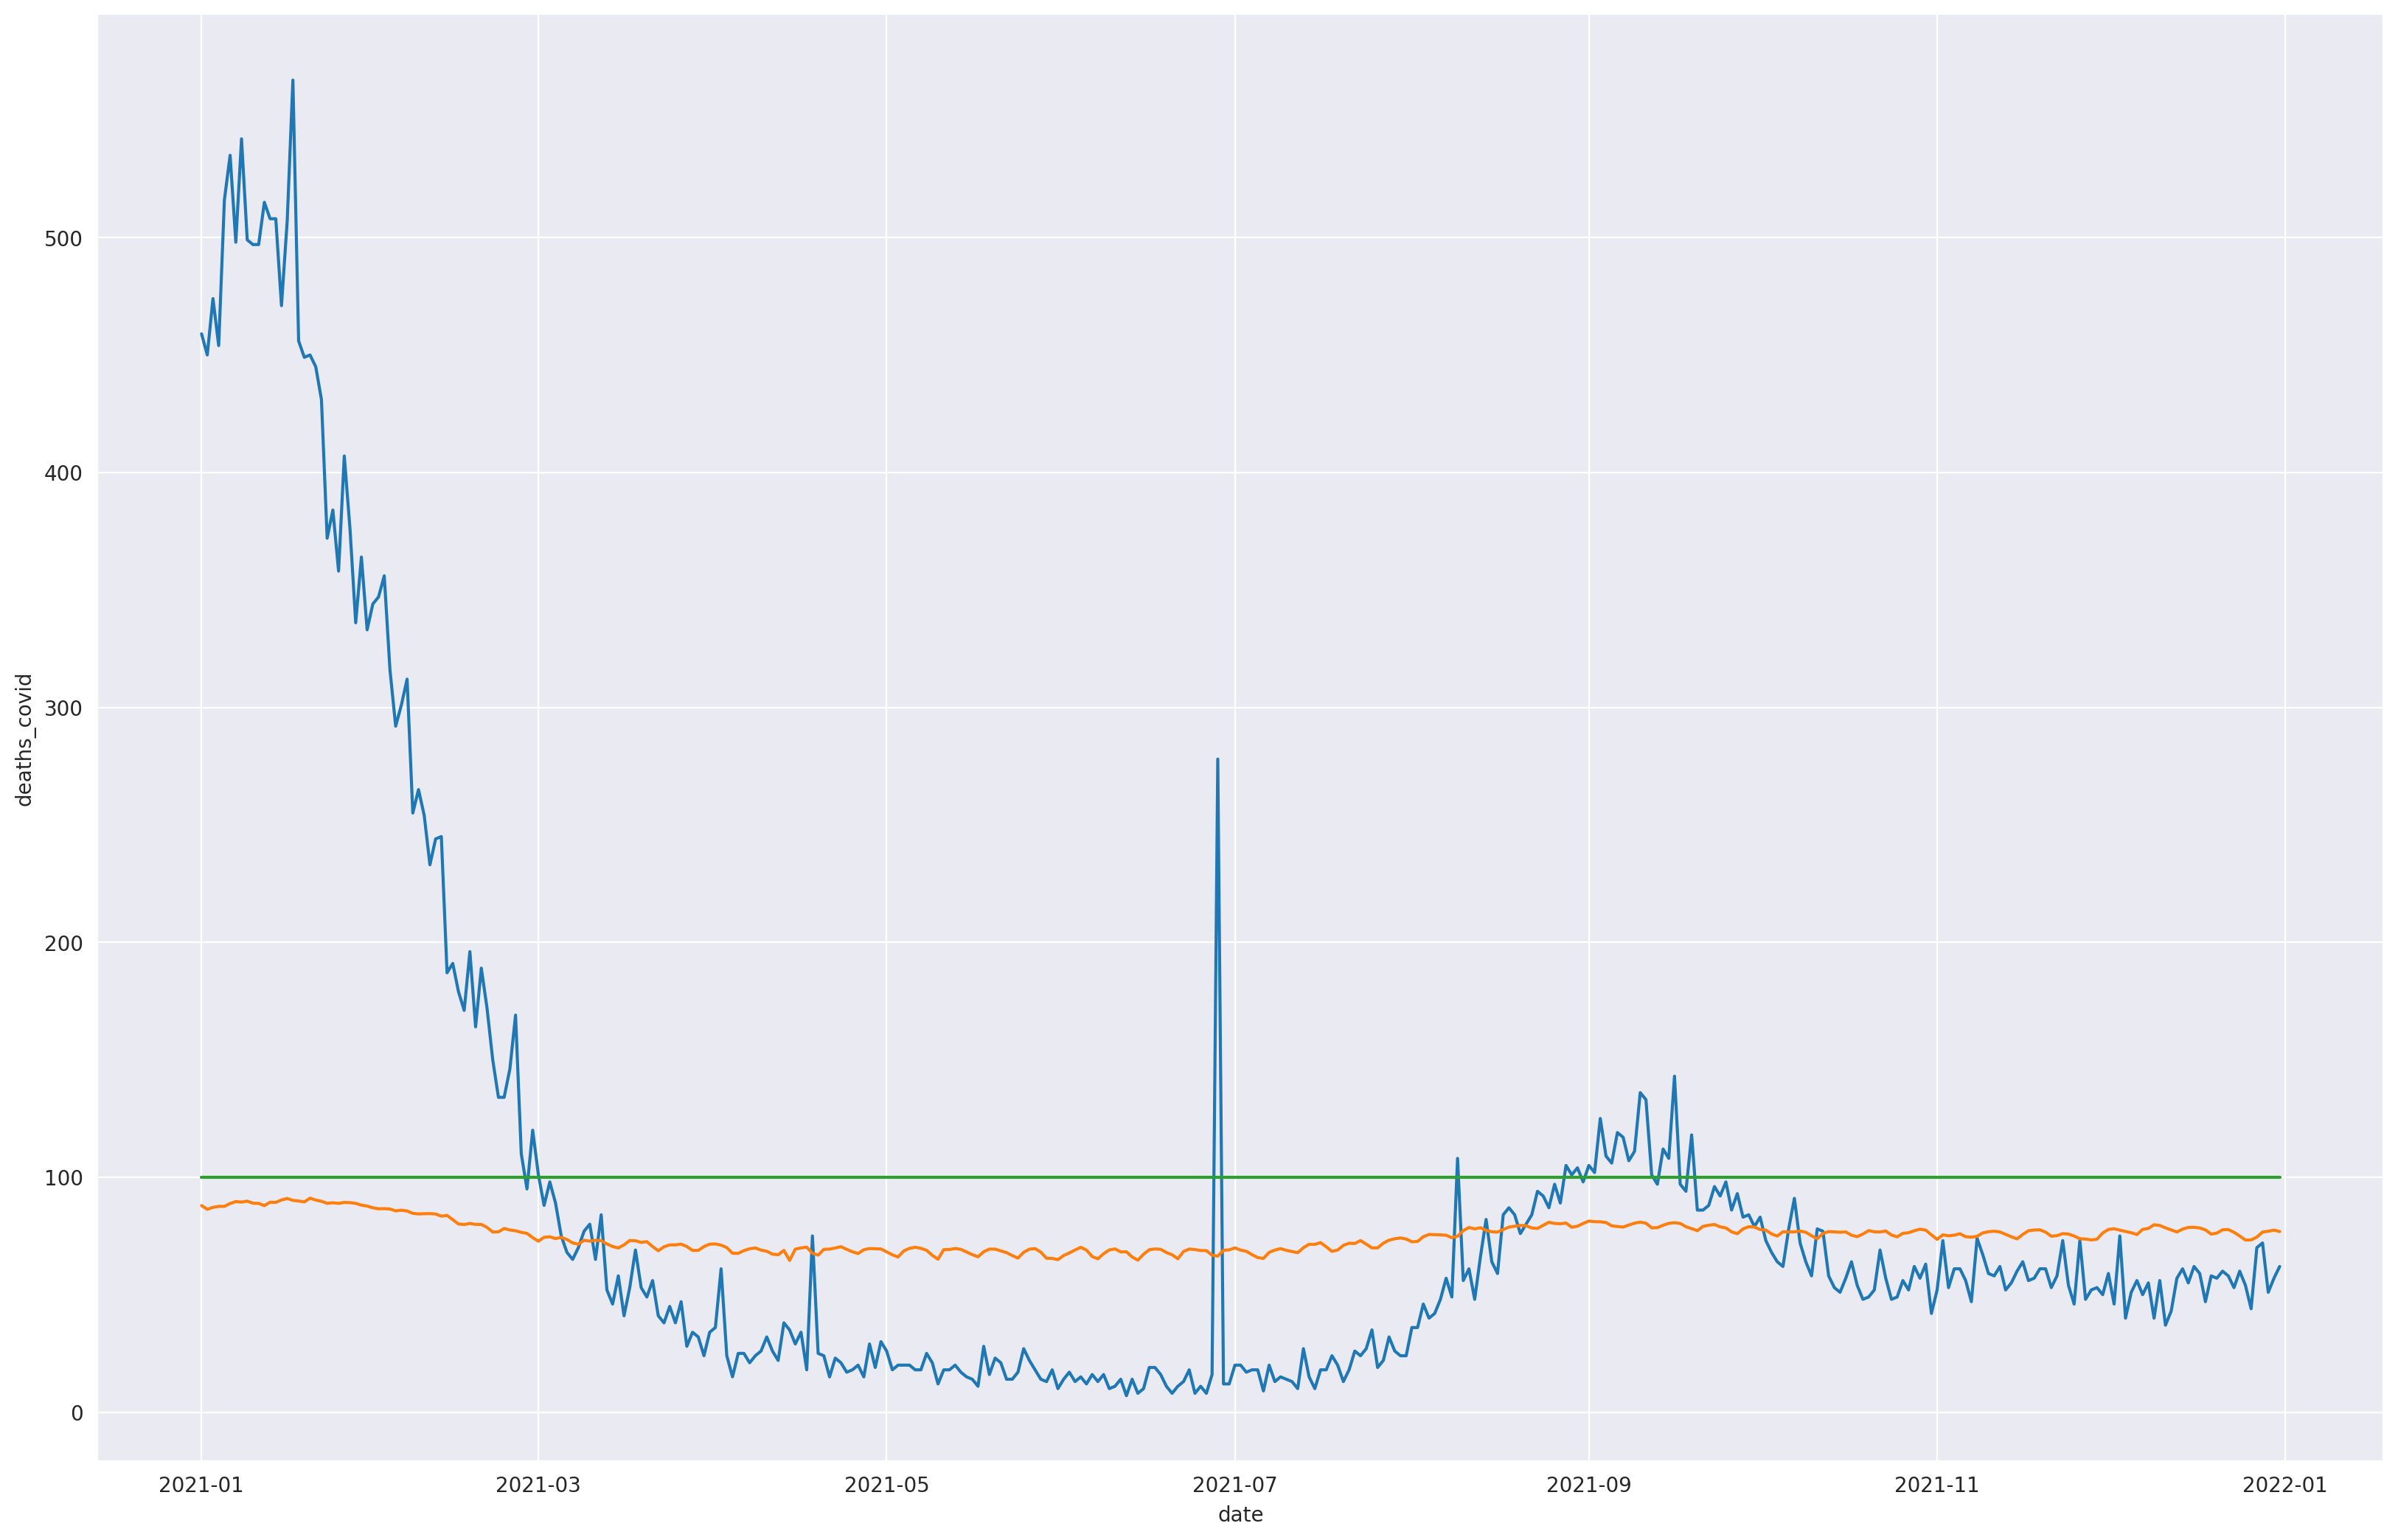

In [61]:
fig, ax = plt.subplots(figsize=(20,13), dpi= 200)
sns.lineplot(data=muertes_camas_CA, x='date', y='deaths_covid')
sns.lineplot(data=muertes_camas_CA, x='date', y='adult_icu_bed_utilization')
sns.lineplot(data=muertes_camas_CA, x='date', y=100)

<AxesSubplot:xlabel='date', ylabel='deaths_covid'>

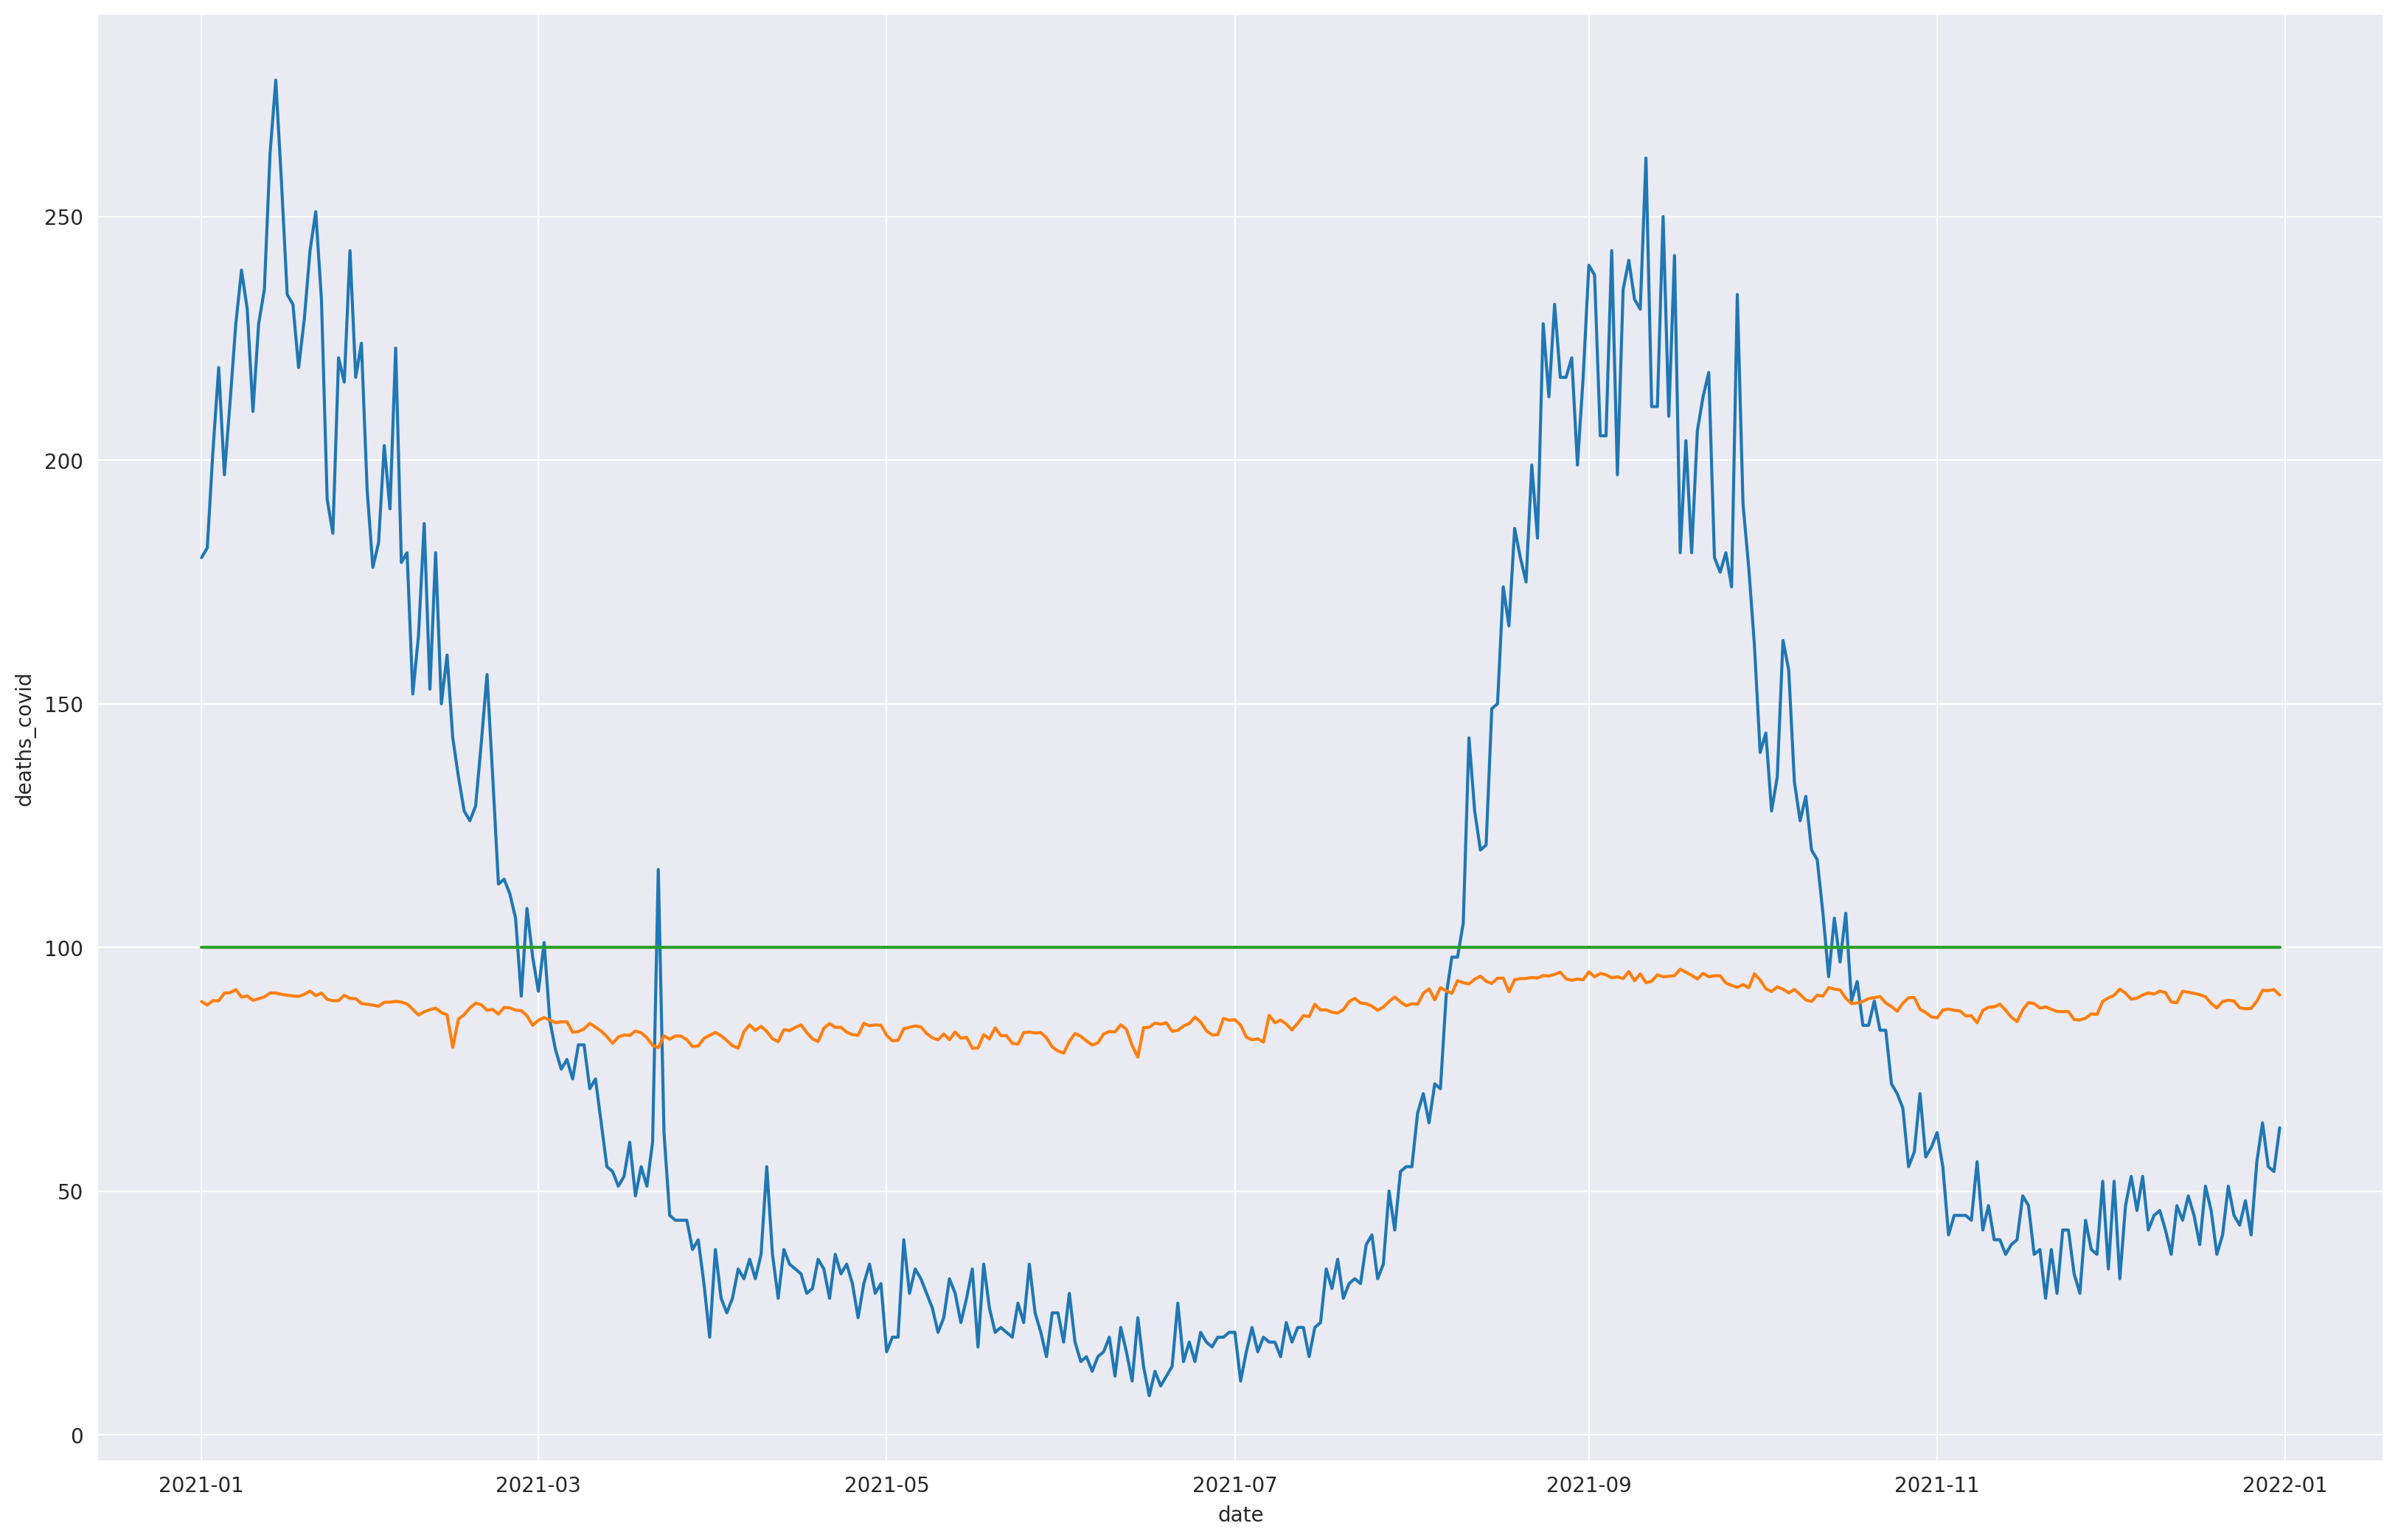

In [62]:
muertes_camas_TX = data_2021.loc[data_2021.state == 'TX']
muertes_camas_TX = muertes_camas_TX[['date', 'deaths_covid', 'adult_icu_bed_utilization']]
muertes_camas_TX['adult_icu_bed_free'] = 1 - muertes_camas_TX['adult_icu_bed_utilization']
muertes_camas_TX = muertes_camas_TX.groupby(by='date').agg({'deaths_covid': 'sum', 'adult_icu_bed_utilization': 'mean'})
muertes_camas_TX['adult_icu_bed_utilization'] = muertes_camas_TX['adult_icu_bed_utilization'] * 100
fig, ax = plt.subplots(figsize=(20,13), dpi= 200)
sns.lineplot(data=muertes_camas_TX, x='date', y='deaths_covid')
sns.lineplot(data=muertes_camas_TX, x='date', y='adult_icu_bed_utilization')
sns.lineplot(data=muertes_camas_TX, x='date', y=100)

In [75]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
